# Probability of market going up next day

### Wouldn't it be nice if we could predict with some degree of probability whether the stock market is going to go up tomorrow?

In [ ]:
### Business question and domain knowledge_ Explicamos
### Se trata de poder predecir la probabilidad que tenemos de que al día siguiente el mercado (índice S&P500) suba teniendo en cuenta los ciertos datos obtenidos hoy (features)

## Attributes
1. **DATE**
2. **ES = S&P 500**: The index is based on the market capitalization of 500 large companies that own shares listed on the NYSE or NASDAQ, capturing approximately 80% of all market capitalization in the United States.


**Moving average (MA)** is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. A moving average helps cut down the amount of noise on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. 

A moving average can also act as support or resistance. In an uptrend a **200-day moving average** may act as a support level. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again.

3. **AVG(5)[1]**: A five-day moving average.
4. **AVG(200)[1]**: A 200-day moving average.


5. **RSI(2)[1]**
6. **VIX[1]**
7. **EUR-USD[1]**
8. **10YR_IR[1]**
9. **CRUDE OIL[1]**
10. **NG[1]**
11. **GOLD[1]**
12. **Change AVG(5)** 
13. **C - AVG(200)**

14. **RSI(2)**: The relative strength index (RSI) is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period. 

15. **VIX**: : The VIX, also known as the “fear indicator”, is a volatility index to quantify market expectations regarding volatility.

16. **Change VIX**
17. **Change EUR-USD**
18. **Change 10YR_IR**
19. **Change CRUDE OIL**
20. **Change NG**
21. **Change GOLD**
22. **S&P500 RET**
23. **RET_LABEL**

## 2. Dataset

### 2.1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

warnings.filterwarnings('ignore')

### 2.2 Importing Dataset

In [2]:
df = pd.read_excel("Midproject_dataset_lst.xlsx")
pd.set_option('display.max_columns', None)
df.head()


,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],GOLD[1],Change AVG(5),C - AVG(200),RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL
0,2004-10-13,1112.00,1129.00,1119.98500,25.759886,15.05,1.2324,112.828,52.51,6.636,416.6,-0.414572,1,25.759886,15.05,0.000000,-0.652963,-0.222068,-1.500657,-7.357253,-1.861013,-0.009133,0
1,2004-10-14,1103.00,1122.80,1119.93625,8.580459,15.42,1.2342,113.094,53.64,6.851,414.6,-0.549159,0,8.580459,15.05,2.458472,0.146056,-0.235757,2.151971,3.239904,-0.480077,-0.008094,0
2,2004-10-19,1103.50,1111.75,1119.68125,63.731022,14.71,1.2493,113.234,53.67,6.806,417.6,-0.237796,0,63.731022,15.04,-2.194149,0.184443,-0.013249,-2.293829,1.445819,-0.595096,-0.008313,0
3,2004-10-20,1101.50,1108.00,1119.55750,23.826584,15.13,1.2512,113.281,53.29,7.123,421.6,-0.337306,0,23.826584,14.71,2.855201,0.152085,-0.041507,-0.708031,4.657655,0.957854,-0.001812,0
4,2004-10-21,1108.25,1105.90,1119.45875,18.749832,14.85,1.2589,113.625,54.92,7.623,424.8,-0.189531,0,18.749832,15.13,-1.850628,0.615409,-0.303670,3.058735,7.019514,0.759013,0.006128,1


### 2.3. First look at the main features

In [6]:
# Viewing dimensions of dataset.
df.shape


(3318, 23)

* The dataset inclueds 22 attributes and 1 output attribute (ret_label)

In [7]:
df.DATE.value_counts

<bound method IndexOpsMixin.value_counts of 0      2004-10-13
1      2004-10-14
2      2004-10-19
3      2004-10-20
4      2004-10-21
          ...    
3313   2019-10-17
3314   2019-10-18
3315   2019-10-22
3316   2019-10-23
3317   2019-10-24
Name: DATE, Length: 3318, dtype: datetime64[ns]>

* The period of time we are dealing with is from **2004-10-14** to **2019-10-24.**

In [8]:
# Viewing the summary of dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              3318 non-null   datetime64[ns]
 1   ES                3318 non-null   float64       
 2   AVG(5)[1]         3318 non-null   float64       
 3   AVG(200)[1]       3318 non-null   float64       
 4   RSI(2)[1]         3318 non-null   float64       
 5   VIX[1]            3318 non-null   float64       
 6   EUR-USD[1]        3318 non-null   float64       
 7   10YR_IR[1]        3318 non-null   float64       
 8   CRUDE OIL[1]      3318 non-null   float64       
 9   NG[1]             3318 non-null   float64       
 10  GOLD[1]           3318 non-null   float64       
 11  Change AVG(5)     3318 non-null   float64       
 12  C - AVG(200)      3318 non-null   int64         
 13  RSI(2)            3318 non-null   float64       
 14  VIX               3318 n

In [9]:
# Checking NaN values
df.isna().sum()


DATE                0
ES                  0
AVG(5)[1]           0
AVG(200)[1]         0
RSI(2)[1]           0
VIX[1]              0
EUR-USD[1]          0
10YR_IR[1]          0
CRUDE OIL[1]        0
NG[1]               0
GOLD[1]             0
Change AVG(5)       0
C - AVG(200)        0
RSI(2)              0
VIX                 0
Change VIX          0
Change EUR-USD      0
Change 10YR_IR      0
Change CRUDE OIL    0
Change NG           0
Change GOLD         0
S&P500 RET          0
RET_LABEL           0
dtype: int64

In [10]:
# Checking duplicates
df[df.duplicated()]

,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],GOLD[1],Change AVG(5),C - AVG(200),RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL


In [11]:
df.columns


Index(['DATE', 'ES', 'AVG(5)[1]', 'AVG(200)[1]', 'RSI(2)[1]', 'VIX[1]',
       'EUR-USD[1]', '10YR_IR[1]', 'CRUDE OIL[1]', 'NG[1]', 'GOLD[1]',
       'Change AVG(5)', 'C - AVG(200)', 'RSI(2)', 'VIX', 'Change VIX',
       'Change EUR-USD', 'Change 10YR_IR', 'Change CRUDE OIL', 'Change NG',
       'Change GOLD', 'S&P500 RET', 'RET_LABEL'],
      dtype='object')

### 2.4. Data cleaning.

In [12]:
# Rename the columns so they follow the PE8 (snake case)
df.columns = df.columns.str.lower().str.replace(" ","_")
df.columns


Index(['date', 'es', 'avg(5)[1]', 'avg(200)[1]', 'rsi(2)[1]', 'vix[1]',
       'eur-usd[1]', '10yr_ir[1]', 'crude_oil[1]', 'ng[1]', 'gold[1]',
       'change_avg(5)', 'c_-_avg(200)', 'rsi(2)', 'vix', 'change_vix',
       'change_eur-usd', 'change_10yr_ir', 'change_crude_oil', 'change_ng',
       'change_gold', 's&p500_ret', 'ret_label'],
      dtype='object')

In [13]:
# Set the date column as index.
df.set_index("date", inplace = True)

<AxesSubplot:xlabel='date', ylabel='es'>

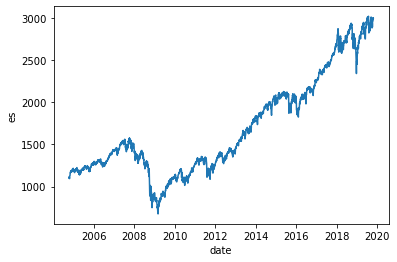

In [14]:
sns.lineplot(data=df, x='date', y="es")

<AxesSubplot:>

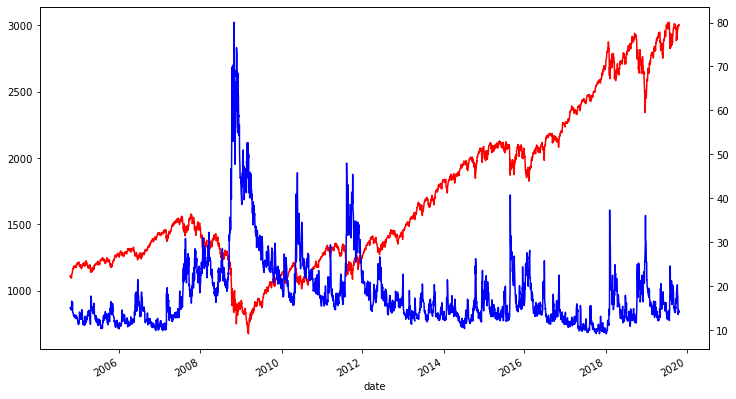

In [15]:
fig, ax = plt.subplots() 
df.es.plot(ax = ax, figsize=(12,7), color='red') 
df.vix.plot(ax = ax, secondary_y = True, color='blue') 


<AxesSubplot:>

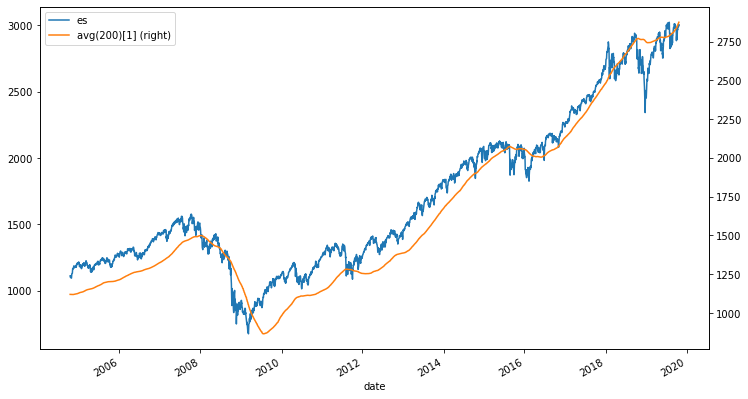

In [16]:
fig, ax = plt.subplots() 
df.plot(y = 'es', ax = ax, figsize=(12,7)) 
df.plot(y = 'avg(200)[1]', ax = ax, secondary_y = True) 

## Attributes

In [ ]:
### Data cleaning is already performed through Excel---
### Try to do de data cleaning through Python in case we have got spare time in the end

### Data cleaning steps
### Data was retrieved from esignal service (all but gold) and from https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data  for gold prices
### Step 1: Each symbol consist of a pair columns (Date,Close). We retrieve all information for each symbol separately\n",
### Step 2: Each symbol different dates (they belong to different Exchanges and trading activity and trading hours/holidays might be different)
### Step 3: Date format need to be changed from (DTYYYYMMDD) to ((MM/DD/YYYY). Date is not important for the project but it is to align the different symbols sets
### Step 4: Technical Indicators on the underlying (AVG(5),AVG(200) & RSI) must be calculated from underlying data (S&P500)
### Step 5: All symbols must be joined/grouped in a single DataFrame accoriding to Date\n",
### Step 6: Transform Data: We are not interested on actual values of S&P500 but on whether it ahs gone up or down. We get return and then a categorical value for it
###  Up: 1 ; Down: 0\n",
### Step 7: Features need to be transformed: We are typically more interested in knowing how other markets have changed (their daily return) than in actual quotes
###        Sometimes there is important information on actual values (i.e VIX or RSI). I case of AVG(200) we just want to know if we are in a long term upside regime (1 or not 0)
### Step 8: VERY, VERY IMPORTANT!!!! 
    ##        Features must belong to prior date. We want to predict if TOMORROW the market is going to go up with TODAY´s information. So we need to make sure that all features information
    ##        has 1 day-lag (For each date , we have S&P500 return (up or down) for the day and features values must belong to yesterdays activity)
### Step 9: Data balancing_ As we need to keep 0s & 1s balanced, 1´s have been removed randomly across the sample in order to match 0s #

## 3. EDA

### 3.1 Stylized Facts

#### Stylized facts is like a specific EDA for asset returns time series. Asset returns typically show some statistical properties that do not appear in other areas
#### It is important to know them in order to build models

<br>

#### 0.-   S&P500 Returns
***

Text(0.5, 0, 'Date')

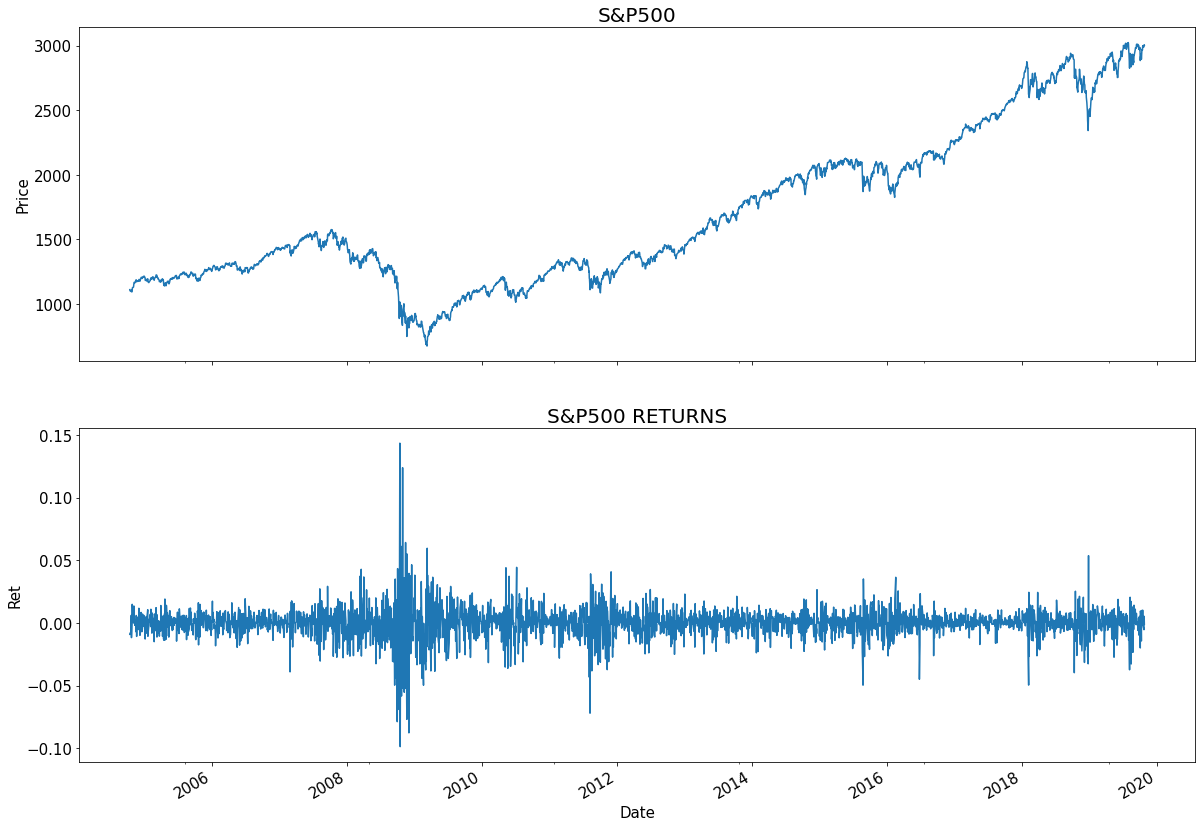

In [17]:
# Lets plot the S&P500 and its returns

fig,ax = plt.subplots(2,1,figsize=(20,15),sharex=True)

df.es.plot(ax=ax[0], fontsize=15)
ax[0].set()
ax[0].set_title("S&P500",fontsize=20)
ax[0].set_ylabel("Price",fontsize=15)

df["s&p500_ret"].plot(ax=ax[1], fontsize=15)
ax[1].set()
ax[1].set_title("S&P500 RETURNS",fontsize=20)
ax[1].set_ylabel("Ret",fontsize=15)

plt.xlabel('Date', fontsize=15)

<AxesSubplot:ylabel='Density'>

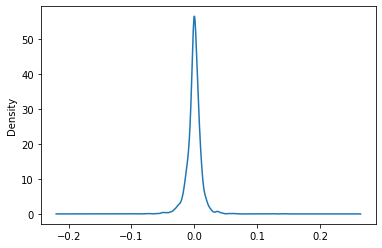

In [18]:
df['s&p500_ret'].plot(kind='kde')

<br>

#### 1.- Gaussian Returns?
***

In [19]:
ret = df['s&p500_ret']
rng =  np.linspace(min(ret),max(ret),num=1000)
mu = ret.mean()
sigma = ret.std()
norm_pdf = stats.norm.pdf(rng,loc=mu,scale=sigma)

In [ ]:
# We plot the histogram & QQplot

Text(0.5, 1.0, 'Q-Q plot')

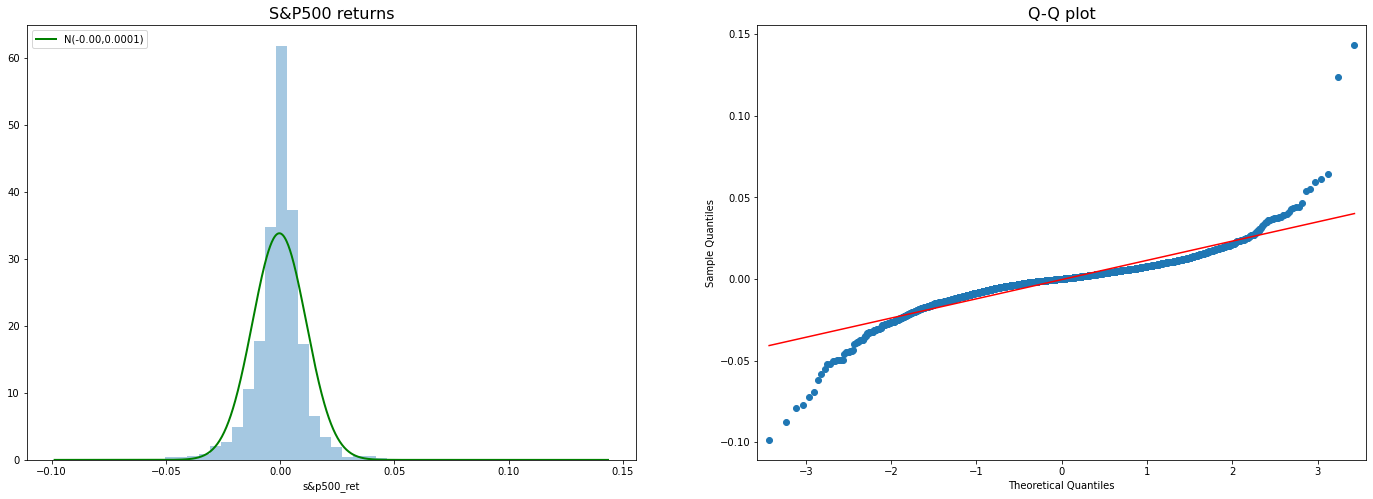

In [20]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

# Histogram (subplot1):
sns.distplot(ret, kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title("S&P500 returns",fontsize=16)
ax[0].plot(rng,norm_pdf,"g",lw=2,label=f'N({mu:.2f},{sigma**2:.4f})')
ax[0].legend(loc="upper left")

## Q-Q plot _ scattered plot of quantiles "something vs normal"
qq = sm.qqplot(ret.values,line='s',ax=ax[1])
ax[1].set_title('Q-Q plot',fontsize=16)

In [ ]:
# Q-Qplot is clear, returns are not normally distributed. Fat tails

In [21]:
# Some analysis 
ret.describe()

count    3318.000000
mean       -0.000368
std         0.011788
min        -0.098728
25%        -0.004676
50%         0.000045
75%         0.004903
max         0.143460
Name: s&p500_ret, dtype: float64

In [22]:
#Skewness and kurtosis of S&P500 returns. Jarque Bera test confirms returns do not follow a Normal distribution
print("Skewness:",ret.skew())
print("Kurtosis:",ret.kurtosis())
print(stats.jarque_bera(ret))

Skewness: 0.0958667725779846
Kurtosis: 17.207208646230413
Jarque_beraResult(statistic=40807.43508483412, pvalue=0.0)


In [ ]:
# Accortding to mean, std, Skewness and kurtosis we can infere distribution is not normal. 
# Specifically we can see kurtosis as the main feature of this distribution : Fat tails
# Besides Jarque Bera normality test would make us reject distribution is normal at 99% level

# Therefore we can reject null hypothesis at the 99% confidence level since pvalue is 0.0 (<0.05). Returns on S&P500 are not normally distributed

<br>

#### Volatility clustering
***

Text(0, 0.5, 'Ret')

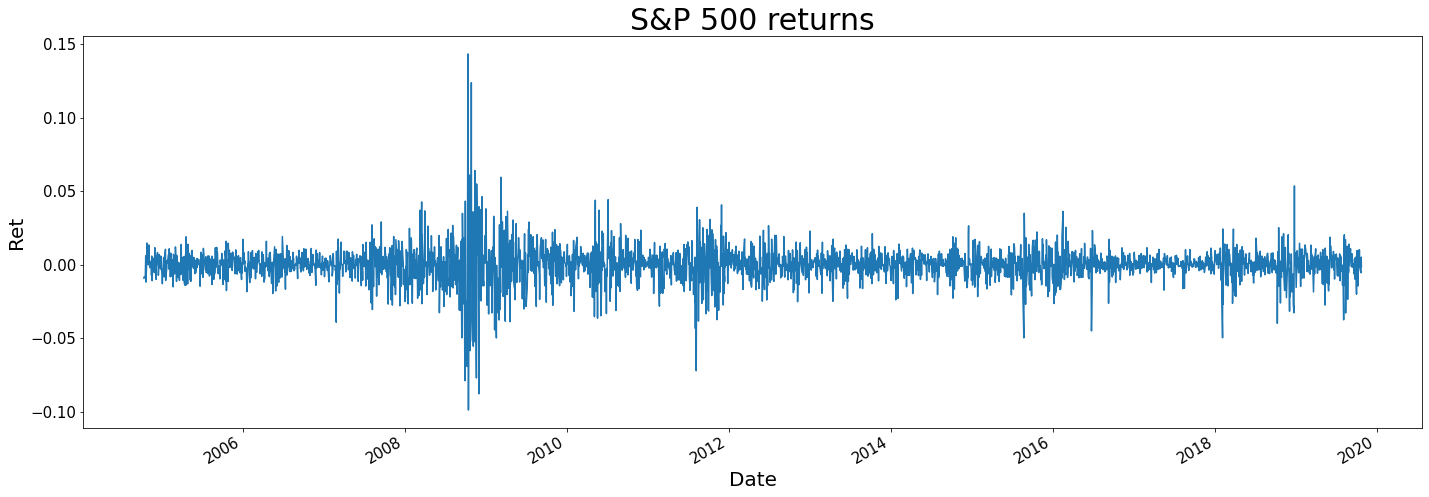

In [23]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
ret.plot(fontsize=15)
plt.title('S&P 500 returns', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Ret', fontsize=20)


In [ ]:
# Volatility seems to cluster (periods of high/low volatility in market returns tend to persist)....Conditional Heteroskedaticity

<br>

#### Autocorrelation in returns
***

In [ ]:
# We now take a look to autocorrelation (How similar is a given time series to the lagged version of itself)
# Previous plot shows that returns tend to jump around zero and we see no persistent trends, this means little autocorrelation
# This are not good news for predicting future outcomes, there would be no way to make money if price follows a random walk
# Lets check this more visually through autocorrelation function (ACF)

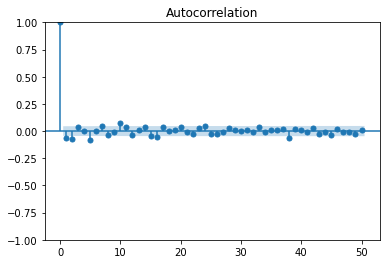

In [24]:
N_LAGS = 50
SIGNIFCANCE_LEVEL=0.01
acf = smt.graphics.plot_acf(ret,lags = N_LAGS,alpha=SIGNIFCANCE_LEVEL)

In [ ]:
# Most of the values lie between the confidence interval. We can asume that there is no autocorrelation in the returns

<br>

#### Leverage effect
***

In [25]:
# Volatility measures as rolling standard deviations
df['moving_avg_std_252'] = df[["s&p500_ret"]].rolling(window=252).std()
df['moving_avg_std_21'] = df[["s&p500_ret"]].rolling(window=21).std()

<AxesSubplot:xlabel='date'>

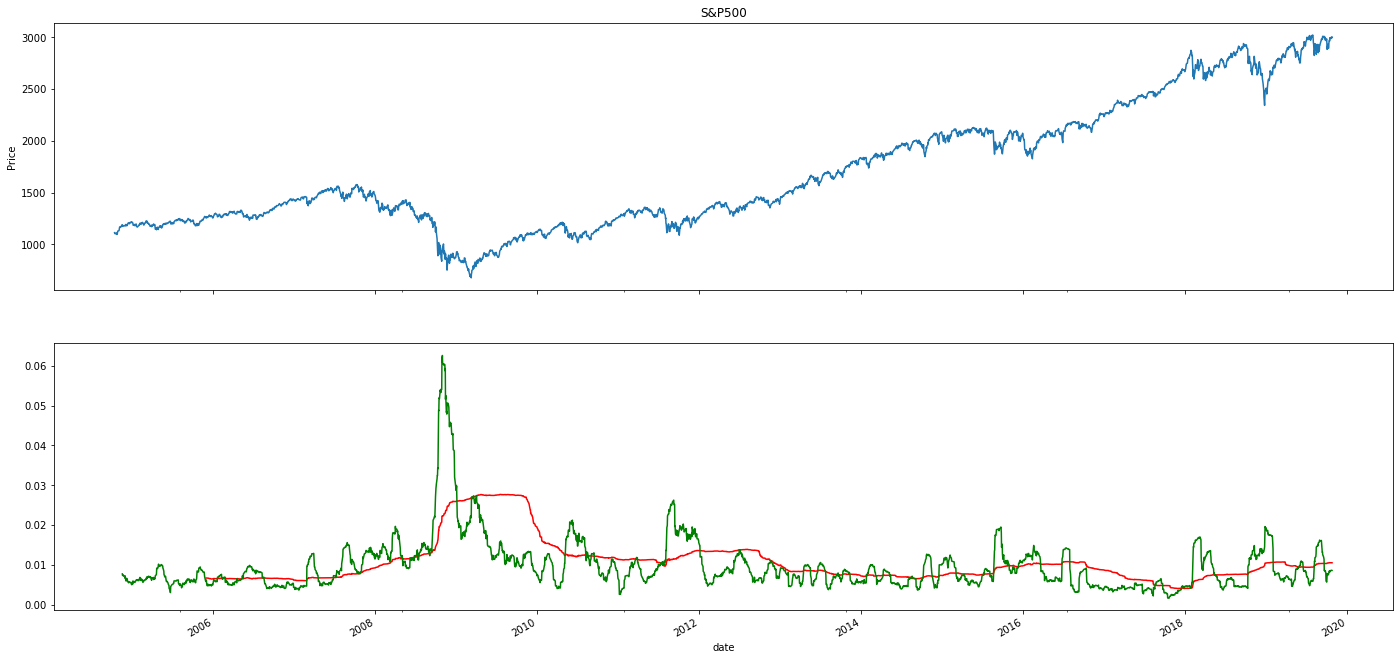

In [26]:
# Series

fig,ax = plt.subplots(2,1,figsize=(24,12),sharex=True)

df.es.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df['moving_avg_std_252'].plot(ax=ax[1],color='r',label = 'Moving Volatility 252d')
df['moving_avg_std_21'].plot(ax=ax[1],color='g',label = 'Moving Volatility 21d')


In [ ]:
# We see an important feature of financial time series: asset volatility is negatively correlated with returns.In this case we´re taking a look at realized volatility
# Asset returns volatility is typically considered as the "fear index", volatility increases when market drops, so it is typically negatively correlated to market returns

### 3.1 EDA other variables

In [27]:
col_start = df.iloc[:, 10:21]
col_end = df.iloc[:, 21:22]
new_df = pd.concat([col_start, col_end], axis=1)
new_df.head()

,change_avg(5),c_-_avg(200),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret,ret_label
date,,,,,,,,,,,,
2004-10-13,-0.414572,1,25.759886,15.05,0.000000,-0.652963,-0.222068,-1.500657,-7.357253,-1.861013,-0.009133,0
2004-10-14,-0.549159,0,8.580459,15.05,2.458472,0.146056,-0.235757,2.151971,3.239904,-0.480077,-0.008094,0
2004-10-19,-0.237796,0,63.731022,15.04,-2.194149,0.184443,-0.013249,-2.293829,1.445819,-0.595096,-0.008313,0
2004-10-20,-0.337306,0,23.826584,14.71,2.855201,0.152085,-0.041507,-0.708031,4.657655,0.957854,-0.001812,0
2004-10-21,-0.189531,0,18.749832,15.13,-1.850628,0.615409,-0.303670,3.058735,7.019514,0.759013,0.006128,1


In [28]:
new_df.shape

(3318, 12)

In [29]:
new_df.dtypes

change_avg(5)       float64
c_-_avg(200)          int64
rsi(2)              float64
vix                 float64
change_vix          float64
change_eur-usd      float64
change_10yr_ir      float64
change_crude_oil    float64
change_ng           float64
change_gold         float64
s&p500_ret          float64
ret_label             int64
dtype: object

In [30]:
new_df.isna().sum()


change_avg(5)       0
c_-_avg(200)        0
rsi(2)              0
vix                 0
change_vix          0
change_eur-usd      0
change_10yr_ir      0
change_crude_oil    0
change_ng           0
change_gold         0
s&p500_ret          0
ret_label           0
dtype: int64

In [31]:
df_continuous = new_df.select_dtypes(include=['float64'])
df_continuous.head()

,change_avg(5),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret
date,,,,,,,,,,
2004-10-13,-0.414572,25.759886,15.05,0.000000,-0.652963,-0.222068,-1.500657,-7.357253,-1.861013,-0.009133
2004-10-14,-0.549159,8.580459,15.05,2.458472,0.146056,-0.235757,2.151971,3.239904,-0.480077,-0.008094
2004-10-19,-0.237796,63.731022,15.04,-2.194149,0.184443,-0.013249,-2.293829,1.445819,-0.595096,-0.008313
2004-10-20,-0.337306,23.826584,14.71,2.855201,0.152085,-0.041507,-0.708031,4.657655,0.957854,-0.001812
2004-10-21,-0.189531,18.749832,15.13,-1.850628,0.615409,-0.303670,3.058735,7.019514,0.759013,0.006128


In [32]:
df_discrete = new_df.select_dtypes(include=['int64'])
df_discrete.head()

,c_-_avg(200),ret_label
date,,
2004-10-13,1,0
2004-10-14,0,0
2004-10-19,0,0
2004-10-20,0,0
2004-10-21,0,1


#### 3.1.1 Descriptive statistics for each feature

In [33]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
change_avg(5),3318.0,0.029126,0.494940,-4.352337,-0.168245,0.065465,0.274594,5.895183
c_-_avg(200),3318.0,0.776371,0.416739,0.000000,1.000000,1.000000,1.000000,1.000000
rsi(2),3318.0,56.468705,31.151052,0.058362,27.863205,61.207396,85.096131,99.978956
vix,3318.0,18.396100,8.828802,9.140000,12.902500,15.660000,20.957500,80.060000
change_vix,3318.0,0.263282,7.822139,-29.572650,-3.970226,-0.571196,3.349420,115.597920
change_eur-usd,3318.0,-0.002941,0.605866,-2.900256,-0.351730,0.000000,0.322398,3.587892
change_10yr_ir,3318.0,-0.005692,0.381477,-3.309204,-0.224674,-0.013053,0.209183,2.934617
change_crude_oil,3318.0,0.024103,2.329444,-12.134322,-1.223065,0.057995,1.281203,23.439242
change_ng,3318.0,-0.007733,3.182512,-16.840759,-1.832657,-0.131989,1.585287,27.175033
change_gold,3318.0,0.040675,1.163665,-9.344612,-0.500351,0.046236,0.643447,8.968610


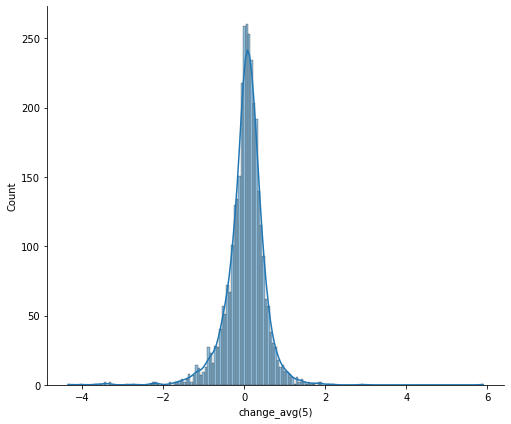

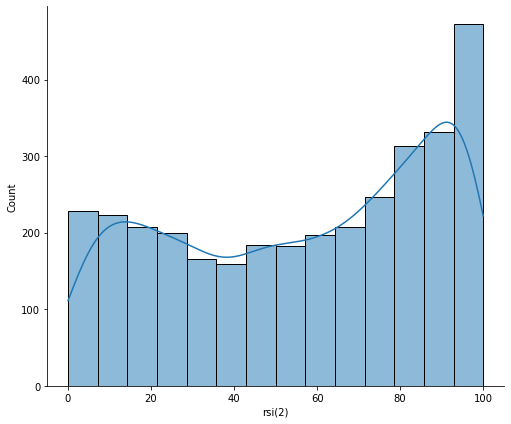

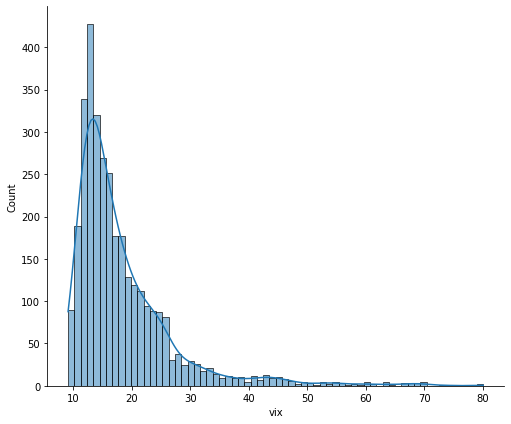

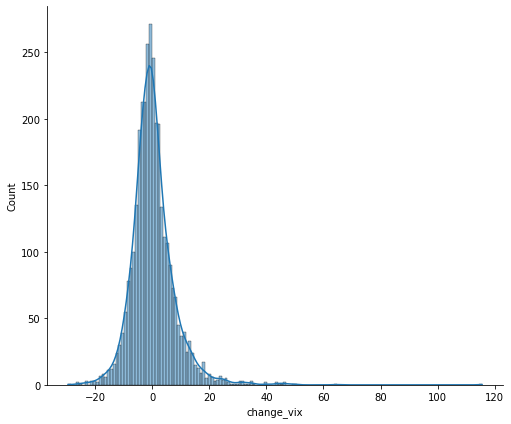

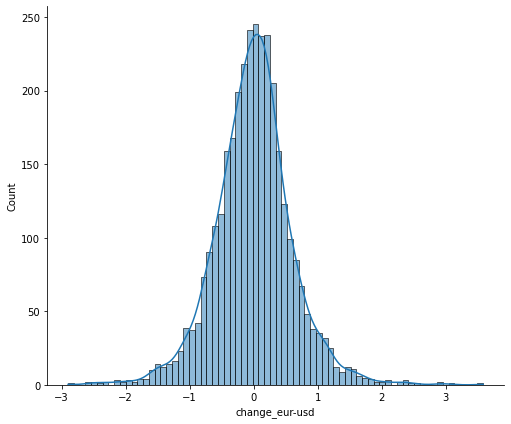

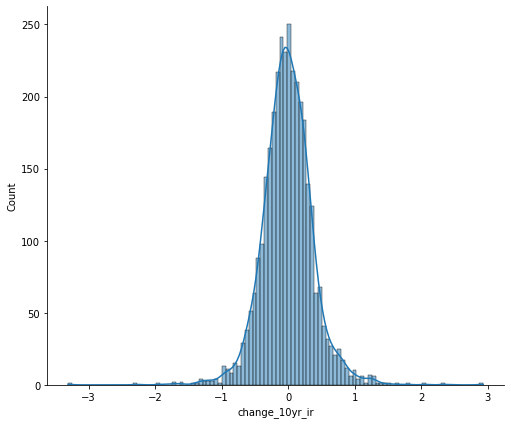

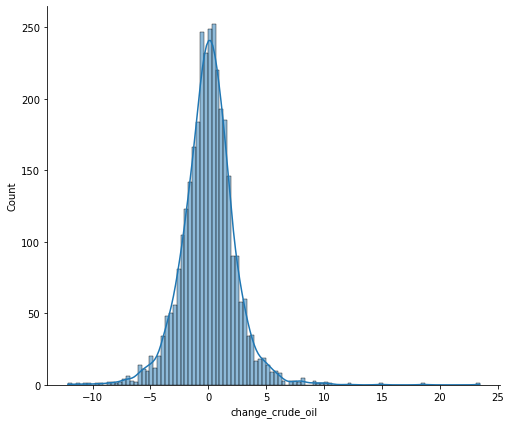

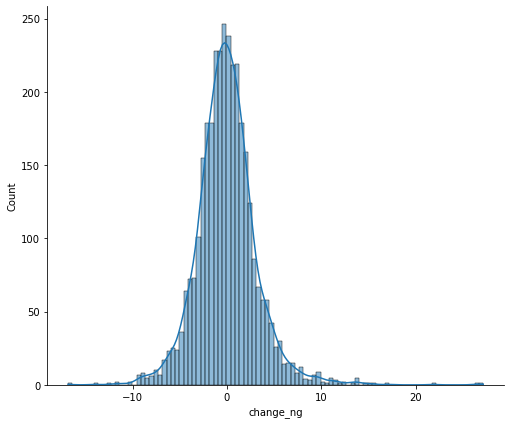

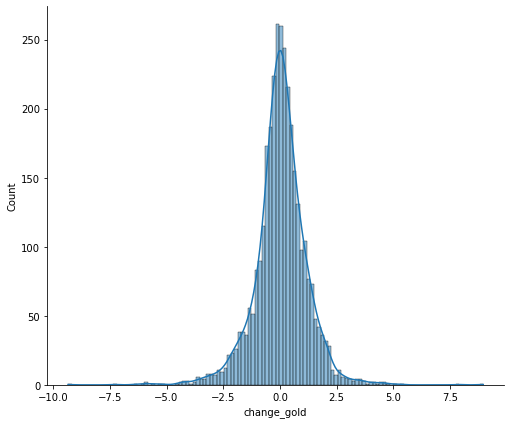

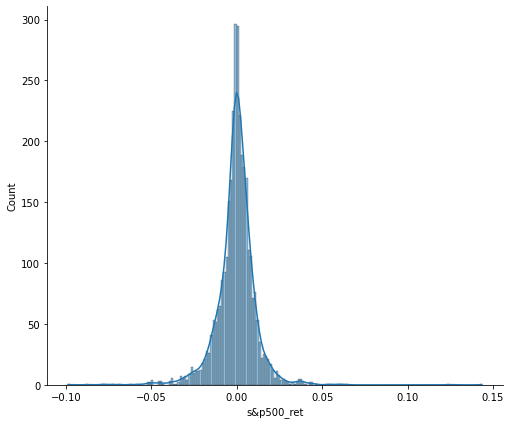

In [34]:
# Display all the plot for the continuous features.
for col in df_continuous:
    sns.displot(data=df_continuous, x= df_continuous[col], kde = True, height=6, aspect=1.2)
    plt.show()

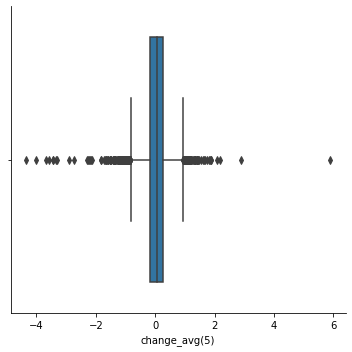

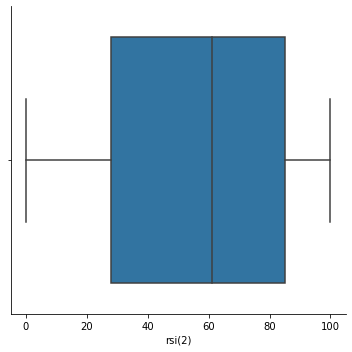

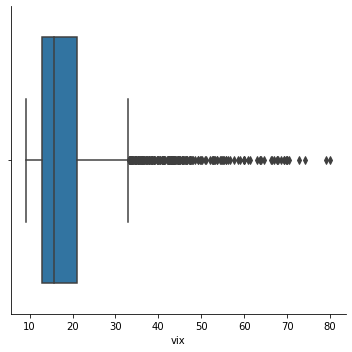

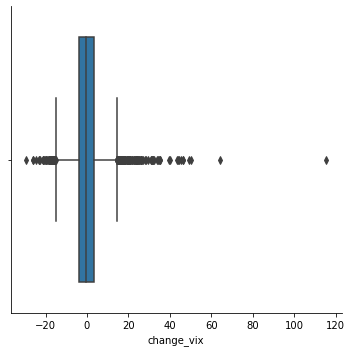

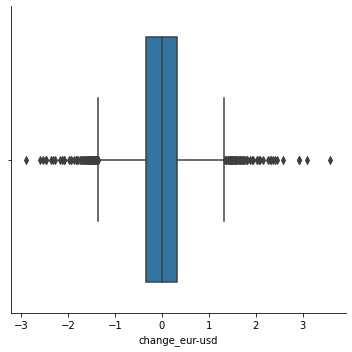

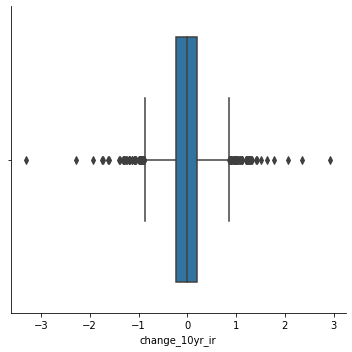

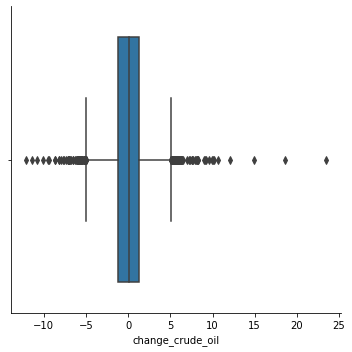

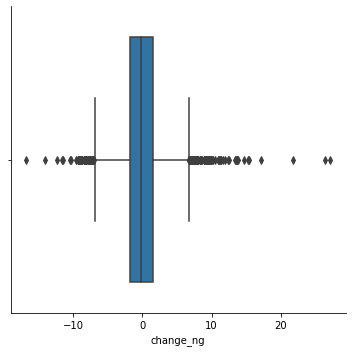

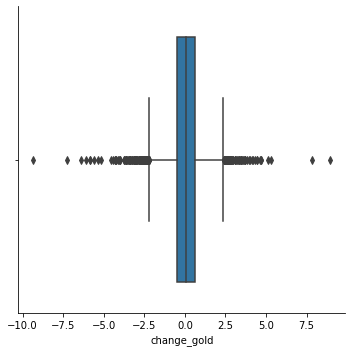

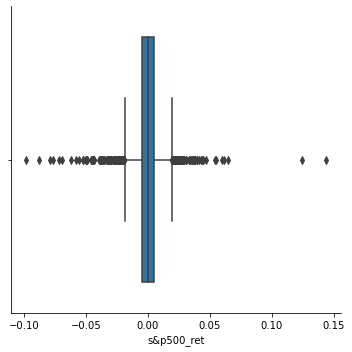

In [35]:
# Looking for the outliers.
for col in df_continuous:
    sns.catplot(data=df_continuous, x= col, kind="box")
    plt.show()

#### 3.1.2 Bivariate analysis

In [ ]:
#sns.pairplot(new_df)

#### 3.1.3 Multicolinearity between the features 

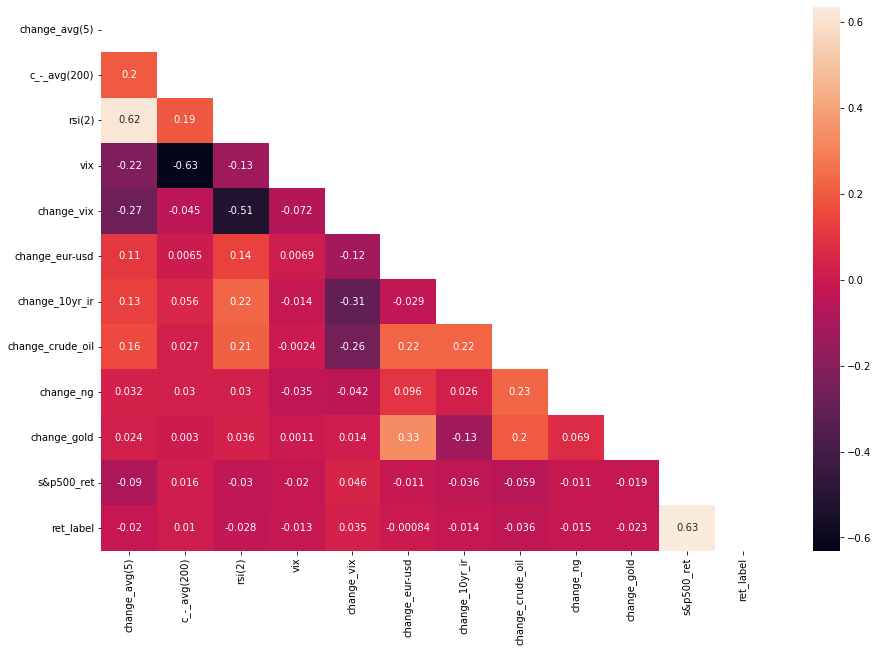

In [36]:
correlations = new_df.corr()      
mask = np.zeros_like(correlations)                
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))          
ax = sns.heatmap(correlations, mask = mask, annot = True)
plt.show()

#### 3.1.4 Looking the dicrete variables

<AxesSubplot:xlabel='ret_label', ylabel='count'>

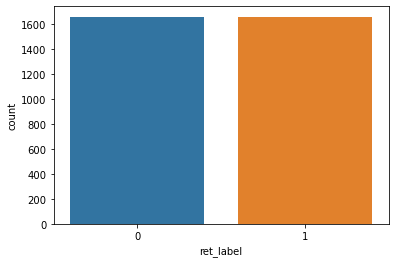

In [37]:
sns.countplot(x="ret_label", data=new_df)

In [38]:
new_df.ret_label.value_counts(normalize=True)


0    0.5
1    0.5
Name: ret_label, dtype: float64

<AxesSubplot:xlabel='c_-_avg(200)', ylabel='count'>

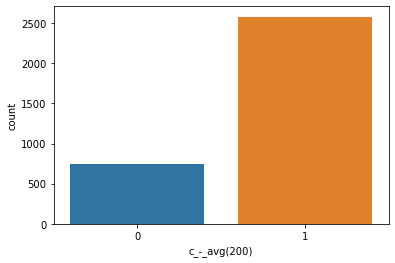

In [39]:
sns.countplot(x="c_-_avg(200)", data=new_df)

In [40]:
new_df['c_-_avg(200)'].value_counts(normalize=True)

1    0.776371
0    0.223629
Name: c_-_avg(200), dtype: float64

## 5. Predictive Modelling


In [42]:
# Create X and y
X = new_df.iloc[:,:-2]
y = new_df.iloc[:,-1]

In [43]:
# Train/ Test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf = 200)

In [45]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

In [ ]:
## Visualizing the tree

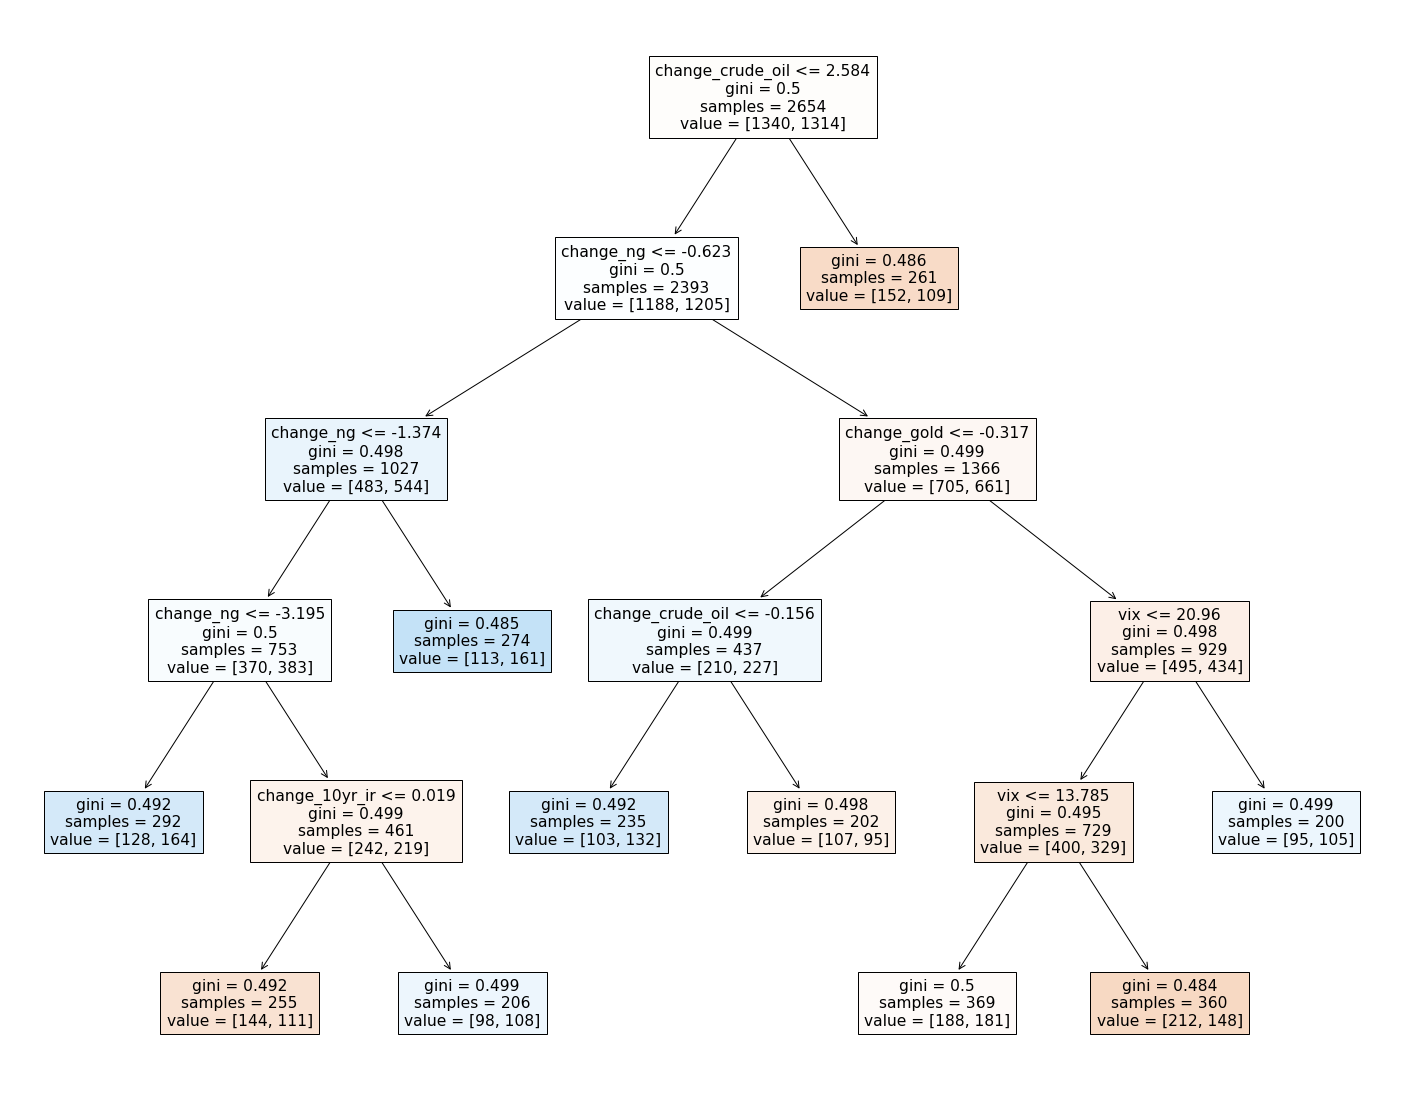

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, feature_names = X.columns,filled=True)

In [47]:
print("Train score:{}".format(classifier.score(X_train,y_train)))
print("Test score:{}".format(classifier.score(X_test,y_test)))

Train score:0.5550113036925396
Test score:0.5060240963855421


In [ ]:
# Poor score(mean accuracy) on test data. Lightly overfitted

## Random Forest

In [48]:
#Lets try a preliminar approach with just 100 trees

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100,min_samples_split = 300)  #Lets build it with 5000 trees
classifier.fit(X_train,y_train)
print("Train score:{}".format(classifier.score(X_train,y_train)))
print("Test score:{}".format(classifier.score(X_test,y_test)))

Train score:0.7027128862094951
Test score:0.5271084337349398


In [93]:
# Lets try now with a much larger # of trees

classifier = RandomForestClassifier(n_estimators = 5000,min_samples_split = 100)  #Lets build it with 5000 trees and different min_samples value
classifier.fit(X_train,y_train)
print("Train score:{}".format(classifier.score(X_train,y_train)))
print("Test score:{}".format(classifier.score(X_test,y_test)))

Train score:0.7908496732026143
Test score:0.4735632183908046


In [ ]:
# Not too much difference but we can see here is an optimization problem

### Features reduction
##### We would like to have as few features as possible to avoid overfitting (Curse of Dimensionality). The number of configurations grows exponentially as the #
##### of features increases--> the number of configurations covered by an observation decreases ---> we learn less and less although we might be able to train the data perfectly
##### We need to select useful features only

In [50]:
classifier.feature_importances_

array([0.10296544, 0.00346044, 0.10084613, 0.09596406, 0.11354518,
       0.1270984 , 0.10200848, 0.12489579, 0.12057163, 0.10864444])

In [51]:
new_df.columns[:-2]

Index(['change_avg(5)', 'c_-_avg(200)', 'rsi(2)', 'vix', 'change_vix',
       'change_eur-usd', 'change_10yr_ir', 'change_crude_oil', 'change_ng',
       'change_gold'],
      dtype='object')

In [52]:
# Feature importance

feature_importance = pd.DataFrame({"Features":new_df.columns[:-2],
                                   "Value":classifier.feature_importances_})

feature_importance.sort_values(["Value"],ascending=False)

,Features,Value
5,change_eur-usd,0.127098
7,change_crude_oil,0.124896
8,change_ng,0.120572
4,change_vix,0.113545
9,change_gold,0.108644
0,change_avg(5),0.102965
6,change_10yr_ir,0.102008
2,rsi(2),0.100846
3,vix,0.095964
1,c_-_avg(200),0.003460


In [ ]:
# Although it seems quite balanced contribution. Lets reduce # of features to the first 5

In [53]:
new_df2 = df[['change_eur-usd','change_ng','change_crude_oil','change_vix','change_10yr_ir','s&p500_ret','ret_label']]

In [54]:
new_df2.head(5)

,change_eur-usd,change_ng,change_crude_oil,change_vix,change_10yr_ir,s&p500_ret,ret_label
date,,,,,,,
2004-10-13,-0.652963,-7.357253,-1.500657,0.000000,-0.222068,-0.009133,0
2004-10-14,0.146056,3.239904,2.151971,2.458472,-0.235757,-0.008094,0
2004-10-19,0.184443,1.445819,-2.293829,-2.194149,-0.013249,-0.008313,0
2004-10-20,0.152085,4.657655,-0.708031,2.855201,-0.041507,-0.001812,0
2004-10-21,0.615409,7.019514,3.058735,-1.850628,-0.303670,0.006128,1


### Custom train-test periods

In [ ]:
# IMPORTANT: since our goal would be to check whether we can find a relationship of today´s features values and tomorrow´s market output we would like predictions to
# be labeled as a Time series. This means that train-test periods must consist of sequential observations/instances. In order to do so, we split data into 
# In Sample / Out of sample (train/test) periods 3:1

In [55]:
len(new_df2)

3318

In [ ]:
# Train length should be 3318*0.80 = 2654
# Test length should be 3318 - 2488 = 830


In [56]:
X_train = new_df2.iloc[0:2448,0:-2]
y_train = new_df2.iloc[0:2448,-1]

In [57]:
X_test = new_df2.iloc[2448:,0:-2]
y_test = new_df2.iloc[2448:,-1]

In [ ]:
classifier = RandomForestClassifier(n_estimators = 300,min_samples_split = 10, max_depth = 3) 
classifier.fit(X_train,y_train)

print("Train score:{}".format(classifier.score(X_train,y_train)))
print("Test score:{}".format(classifier.score(X_test,y_test)))

### Hyperparameter tunning

In [58]:
# We now have a new reduced data frame. Lets find best parameters for Random forest here

## We check for best hyperparameters setup

param_grid = {
    'n_estimators': [100,1000,5000],
    'min_samples_split': [50,150,500],
    'max_depth': [3,6]
}


In [60]:
from sklearn.model_selection import GridSearchCV

CV_classifier = GridSearchCV(estimator = classifier, param_grid = param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(min_samples_split=100),
             param_grid={'max_depth': [3, 6],
                         'min_samples_split': [50, 150, 500],
                         'n_estimators': [100, 1000, 5000]})

In [61]:
print("Results from Grid Search")
print("\n The best estimator across ALL searched params:\n",CV_classifier.best_estimator_)
print("\n The best estimator across ALL searched params:\n",CV_classifier.best_params_)

Results from Grid Search

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=3, min_samples_split=150)

 The best estimator across ALL searched params:
 {'max_depth': 3, 'min_samples_split': 150, 'n_estimators': 100}


In [62]:
# We apply optimized values
classifier = RandomForestClassifier(n_estimators = 100,min_samples_split = 150, max_depth = 3) 
classifier.fit(X_train,y_train)

print("Train score:{}".format(classifier.score(X_train,y_train)))
print("Test score:{}".format(classifier.score(X_test,y_test)))

Train score:0.5829248366013072
Test score:0.4850574712643678


In [ ]:
# Results are very poor

### Evaluation

<AxesSubplot:>

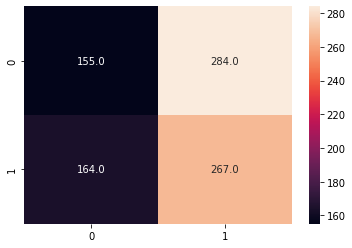

In [63]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,classifier.predict(X_test))

sns.heatmap(cm,annot = True, fmt =".1f")

In [65]:
# We use the fores´t predict method on the test data
y_pred = classifier.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

print(classification_report(y_train,classifier.predict(X_train)))

[[155 284]
 [164 267]]
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       439
           1       0.48      0.62      0.54       431

    accuracy                           0.49       870
   macro avg       0.49      0.49      0.48       870
weighted avg       0.49      0.49      0.48       870

0.4850574712643678
              precision    recall  f1-score   support

           0       0.60      0.47      0.53      1220
           1       0.57      0.69      0.62      1228

    accuracy                           0.58      2448
   macro avg       0.59      0.58      0.58      2448
weighted avg       0.59      0.58      0.58      2448



In [67]:
### Getting Predictions by date

df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).sort_index()

df_pred.head(10)

,Actual,Predicted
date,,
2015-11-23,0,1
2015-11-25,1,1
2015-11-30,0,1
2015-12-01,1,1
2015-12-02,0,0
2015-12-03,0,1
2015-12-04,1,0
2015-12-07,0,0
2015-12-08,0,1


In [68]:
# We export this to excel in order to create Equity curves faster
df_pred.to_excel(r'C:\Users\cprieto\random_forest_pred_last.xlsx',index=True)

## Hypothesis Testing

In [73]:
# We import data por Hypothesis testing preprocessed in Excel
df_t_test = pd.read_excel("t-test_data.xlsx")

In [74]:
df_t_test.columns

Index(['date', 's&p_pred'], dtype='object')

In [76]:
df_t_test["s&p_pred"]

0     -0.002633
1      0.002159
2     -0.001556
3      0.006714
4      0.000000
         ...   
865    0.002005
866    0.000000
867   -0.005405
868    0.005267
869    0.000000
Name: s&p_pred, Length: 870, dtype: float64

In [120]:
n = len(df_t_test["s&p_pred"])
# mean and std
mean = df_t_test['s&p_pred'].mean()
std =df_t_test['s&p_pred'].std()

In [121]:
print(mean,std)

-9.695768034100173e-05 0.006741321487064873


In [122]:
# Hypothesis testing


# H0 : µ= 0  (Population mean = 0) There is no advantage
# H1:  µ≠ 0 

# We calculate p-value
t_ = stats.ttest_1samp(df_t_test['s&p_pred'],popmean=0)



In [112]:
## t value
t_[0]

-0.4242255332887546

In [113]:
## p-value
t_[1]

0.671506337807227

In [96]:
## p-value is way too high. Null hypothesis can not be rejected

### Confidence Interval

In [118]:
t =  stats.t.ppf(0.975, df=n-1) # 2 tail

In [119]:
import math as m
error = t*std/(m.sqrt(n))
confidence_interval = [mean - error, mean + error]
confidence_interval

[-0.0005457952917120529, 0.0003518799310300495]